Import library

library yang diperlukan untuk analisis data, pembuatan model, evaluasi model, dan visualisasi.

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Memuat Dataset

In [2]:
# Memuat data dari file CSV
df = pd.read_csv("D:\\SIC\\Stage 3\\Machine learning\\ai4i2020.csv")

# Menampilkan beberapa baris pertama dataset
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Menampilkan informasi tentang kolom dan tipe data
print(df.info())

| UDI   | Product ID   | Type   | Air temperature [K]   | Process temperature [K]   | Rotational speed [rpm]   | Torque [Nm]   | Tool wear [min]   | Machine failure   | TWF   | HDF   | PWF   | OSF   | RNF   |
|:------|:-------------|:-------|:----------------------|:--------------------------|:-------------------------|:--------------|:------------------|:------------------|:------|:------|:------|:------|:------|
| 1     | M14860       | M      | 298.1                 | 308.6                     | 1551                     | 42.8          | 0                 | 0                 | 0     | 0     | 0     | 0     | 0     |
| 2     | L47181       | L      | 298.2                 | 308.7                     | 1408                     | 46.3          | 3                 | 0                 | 0     | 0     | 0     | 0     | 0     |
| 3     | L47182       | L      | 298.1                 | 308.5                     | 1498                     | 49.4          | 5                 | 0              

Pemrosesan Data

membuat variabel target biner baru (Tool_Wear_Failure) berdasarkan ambang batas aus mesin yang ditentukan yaitu 200 menit. Jika aus mesin lebih dari atau sama dengan 200 menit, maka dianggap gagal (Tool_Wear_Failure = 1), jika tidak maka dianggap tidak gagal (Tool_Wear_Failure = 0).

In [3]:
df['Tool_Wear_Failure'] = (df['Tool wear [min]'] >= 200).astype(int)
print("Distribution of Tool Wear Failure:")
print(df['Tool_Wear_Failure'].value_counts().to_markdown(numalign="left", stralign="left"))

Distribution of Tool Wear Failure:
| Tool_Wear_Failure   | count   |
|:--------------------|:--------|
| 0                   | 9199    |
| 1                   | 801     |


Memisahkan Fitur dan Target

digunakan untuk prediksi (variabel X) dan variabel target yang akan diprediksi (y)

In [4]:
# Memilih fitur dan target
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Tool_Wear_Failure'
X = df[features]
y = df[target]

Membagi Data Menjadi Data Latih dan Data Uji

data tes digunakan untuk melatih model, sedangkan data uji akan digunakan untuk mengevaluasi performa model pada data.

In [5]:
# Membagi data menjadi training dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melatih Model Logistic regression

melatih model regresi logistik pada data tes dengan mempelajari hubungan antara fitur-fitur dan variabel target yang dapat digunakan untuk membuat prediksi dan menggunakan model yang sudah dilatih untuk membuat prediksi pada data uji. Pada bagian ini juga menghitung probabilitas kelas 1 (gagal) untuk setiap sampel pada data uji.

In [6]:
# Melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Evaluasi Model

mencetak laporan klasifikasi yang berisi metrik-metrik evaluasi model seperti presisi, recall, F1-score, dan akurasi untuk setiap kelas (0=No Failure dan 1= failure), serta rata-rata makro dan rata-rata tertimbang.

In [7]:
# Memprediksi menggunakan test set
y_pred = model.predict(X_test)

# Mengevaluasi performa model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1834
           1       0.97      0.99      0.98       166

    accuracy                           1.00      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Visualisasi data

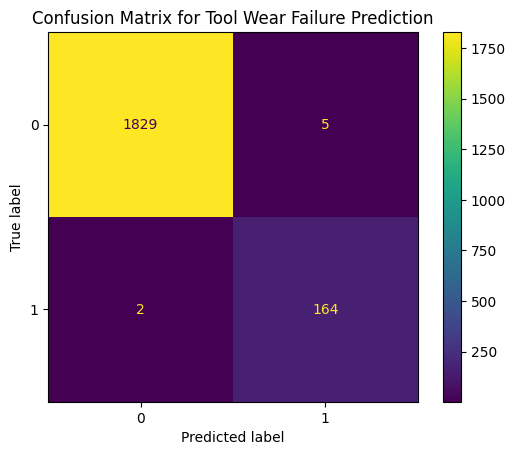

In [8]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix for Tool Wear Failure Prediction')
plt.show()